# <center><font size=100>信用卡客户风险数据分析报告

# <center><font size=10>摘要

# <center><font size=10>    
    为了推进信用卡业务良性发展，减少坏账风险坏账率和不良贷款率，也为了响应国家的金融安全战略，平稳去杠杆，提高贷款质量
    各大银行都进行了信用卡客户风险识别的相关工作，建立了相应的客户风险识别模型。
    某银行因旧的风险识别模型随时间推移不再适应业务发展需求，需要重新进行风险识别模型构建。
    本报告对信用卡客户数据集进行分析，来试图提高银行利润和减少不良贷款

# <center><font size=10>处理信用卡数据的异常值

In [1]:
#训练kmeans聚类模型，并求出聚类中心，每类的用户数目
#画图（书本中的五边形）#特征到底是什么鬼#特征背后的数字是什么含义
#评价聚类模型
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data1=pd.read_csv("D:/Desktop/credit_card.csv",encoding='gb18030')
index1=(data1["瑕疵户"]!=2)|(data1["逾期"]!=1)|(data1["呆账"]!=1)|(data1["退票"]!=1)|(data1["拒往记录"]!=1)|(data1['强制停卡记录']!=1)
index2=(data1['呆账']!=1)|(data1['退票']!=1)|(data1['拒往记录']!=2)|(data1['强制停卡记录']!=1)
index3=(data1["频率"]!=5)|(data1['月刷卡额']==1)
data2 = data1[index1]
data3 = data1[index2]
data4 = data1[index3]
data5 = data1[index1 & index2 & index3]
print('删除异常记录后数据的形状为：',data2.shape,data3.shape,data4.shape,data5.shape)

删除异常记录后数据的形状为： (63339, 28) (65277, 28) (62837, 28) (60578, 28)


# <center><font size=3>
    实训一已完成
    删除了瑕疵户为2逾期呆账退票拒往记录强制停卡记录为1的记录,删除行为恶劣者;
    删除呆账退票强制停卡为1拒往记录为2的记录,删除行为恶劣者;
    删除频率为5刷卡金额不为1的数据,删除不常用的人;

In [2]:
data5_selection1 = data5[['瑕疵户','逾期','呆账','退票','拒往记录','强制停卡记录']]
L = data5_selection1["逾期"]-data5_selection1["呆账"]
data5_features1 = pd.concat([L,data5_selection1.iloc[:,2:]],axis = 1)
print('构建的历史行为特征特征前5行为：\n',data5_features1)
from sklearn.preprocessing import StandardScaler
dataA = StandardScaler().fit_transform(data5_features1)
print('标准化后历史行为五个特征为：\n',dataA[:5,:])

构建的历史行为特征特征前5行为：
        0  呆账  退票  拒往记录  强制停卡记录
0      0   2   2     2       2
1      0   2   2     2       2
2      0   2   2     2       2
3      0   2   2     2       2
4      0   2   2     2       2
5      0   2   2     2       2
7      0   2   2     2       2
8      0   2   2     2       2
9      0   2   2     2       2
10     0   2   2     2       2
11     0   2   2     2       2
12     0   1   1     1       1
13     0   2   2     1       2
14     0   2   2     2       2
15     0   2   2     2       2
16     0   2   2     2       2
17     0   2   2     2       2
18     0   1   1     1       1
20     0   2   2     2       2
21     0   2   2     2       2
22     0   2   2     2       2
23     0   1   2     1       1
24     0   2   2     2       2
25     0   2   2     2       2
26     0   2   2     2       2
27     0   2   2     2       2
29     0   2   2     2       2
30     0   2   2     2       2
31     0   2   2     2       2
32     0   2   2     2       2
...   ..  ..  ..   ..

In [3]:
dataA_kmeans = KMeans(n_clusters = 5,n_jobs=3,random_state=123).fit(dataA) 
print('最终每个类别的数目为：\n',dataA_kmeans)
r1=pd.Series(dataA_kmeans.labels_).value_counts()
print(r1)

最终每个类别的数目为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=3, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)
0    56536
1     2818
2      580
4      514
3      130
dtype: int64


In [4]:
dataA_kmeans.cluster_centers_  

array([[ 0.06877818,  0.22088026,  0.23394218,  0.24852776,  0.24634494],
       [ 0.06877818, -4.30829493, -3.88700628, -3.92515231, -3.98423075],
       [-9.18998702,  0.22088026, -3.68798624, -0.6869418 , -3.98423075],
       [ 9.32754338, -4.52733986, -1.97230087, -4.02369542, -3.98423075],
       [ 0.06877818,  0.22088026,  0.23902695, -4.02369542,  0.25098948]])

In [5]:
dataA_kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
# 绘制雷达图#标签
labels = ['瑕疵户','逾期','呆账','退票','拒往记录','强制停卡记录']
k = 5

In [7]:
plot_data = dataA_kmeans.cluster_centers_#指定颜色

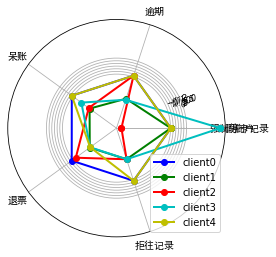

In [8]:
color = ['b', 'g', 'r', 'c', 'y'] 
angles = np.linspace(0, 2*np.pi, k, endpoint=False)# 闭合
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) # 闭合

angles = np.concatenate((angles,[angles[0]])) 
fig = plt.figure()#polar参数
ax = fig.add_subplot(111, polar=True) 
for i in range(len(plot_data)):# 画线
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'client'+str(i), linewidth=2)
ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
plt.legend(loc = 4)
plt.show()

[[ 0.06877818  0.22088026  0.23394218  0.24852776  0.24634494]
 [ 0.06877818 -4.30829493 -3.88700628 -3.92515231 -3.98423075]
 [-9.18998702  0.22088026 -3.68798624 -0.6869418  -3.98423075]
 [ 9.32754338 -4.52733986 -1.97230087 -4.02369542 -3.98423075]
 [ 0.06877818  0.22088026  0.23902695 -4.02369542  0.25098948]]


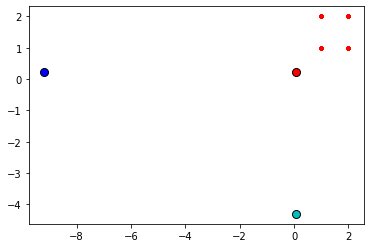

In [9]:
#聚类可视化
x=data5_selection1.iloc[:,:-1]  
y=data5_selection1.iloc[:,-1]
dataA_pre=dataA_kmeans.predict(x) 
centers=dataA_kmeans.cluster_centers_   #类别中心
print(centers)
colors=['r','c','b','g','y']
plt.figure()
for j in range(3):
    index_set=np.where(dataA_pre==j)
    cluster=x.iloc[index_set]
    plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1],c=colors[j],marker='.')  
    plt.plot(centers[j][0],centers[j][1],'o',markerfacecolor=colors[j],markeredgecolor='k',markersize=8)  #画类别中心
plt.show()

In [29]:
from scipy.interpolate import lagrange
from sklearn.metrics import fowlkes_mallows_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

In [35]:
sns.set()
dataA.hist(figsize=(10,10), color='red')
plt.show()
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(wine.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,linecolor='white',annot=True)

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

# <center><font size=3>
    历史行为特征分别在实训二实训三的应用

In [11]:
data5_selection2 = data5[['借款余额','个人月收入','个人月开销','家庭月收入','月刷卡额']]## 选取需求特征
L = data5_selection2["个人月收入"]-data5_selection2["个人月开销"]
data5_features2 = pd.concat([L,data5_selection2.iloc[:,2:]],axis = 1)
print('构建的经济风险情况特征前5行为：\n',data5_features2)
dataB = StandardScaler().fit_transform(data5_features2)
print('标准化后经济风险情况五个特征为：\n',dataB[:5,:])

构建的经济风险情况特征前5行为：
        0  个人月开销  家庭月收入  月刷卡额
0      0      1      1     1
1     -1      2      1     2
2      0      1      1     6
3      0      1      1     4
4     -2      3      1     5
5     -1      2      1     4
7      0      1      1     6
8      0      1      1     1
9      0      1      1     3
10     0      1      1     4
11     0      1      1     3
12    -1      2      1     4
13     0      1      1     2
14     0      1      1     5
15     0      1      1     3
16    -1      2      1     2
17     0      1      1     1
18     0      1      1     4
20    -4      5      1     7
21     0      1      1     3
22    -3      4      1     2
23    -1      2      1     3
24     0      1      1     3
25    -1      2      1     5
26     0      1      1     5
27     0      1      1     2
29     0      1      1     1
30     0      1      1     1
31    -2      3      1     4
32    -1      2      1     6
...   ..    ...    ...   ...
65500  2      2      4     2
65501  1      3      4   

In [12]:
dataB_kmeans = KMeans(n_clusters = 5,n_jobs=3,random_state=123).fit(dataB) 
print('最终每个类别的数目为：\n',dataB_kmeans)
r2=pd.Series(dataB_kmeans.labels_).value_counts()
print(r2)

最终每个类别的数目为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=3, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)
1    20300
4    19537
3     9105
0     7590
2     4046
dtype: int64


In [13]:
dataB_kmeans.cluster_centers_

array([[-1.1626991 ,  2.1312295 , -0.06995361, -0.15519457],
       [-0.60040267, -0.3520296 , -0.59599446, -0.60595563],
       [ 1.87382808, -0.16010739, -1.78638712, -0.02576528],
       [-0.1862576 , -0.21503746, -0.01793718,  1.54824342],
       [ 0.77429634, -0.32881816,  1.02475691, -0.02629288]])

In [14]:
dataB_kmeans.labels_

array([1, 1, 3, ..., 3, 4, 1])

In [15]:
x=data5_selection2.iloc[:,:-1]  
y=data5_selection2.iloc[:,-1]
dataB_pre=dataB_kmeans.predict(x) 

[[-1.1626991   2.1312295  -0.06995361 -0.15519457]
 [-0.60040267 -0.3520296  -0.59599446 -0.60595563]
 [ 1.87382808 -0.16010739 -1.78638712 -0.02576528]
 [-0.1862576  -0.21503746 -0.01793718  1.54824342]
 [ 0.77429634 -0.32881816  1.02475691 -0.02629288]]


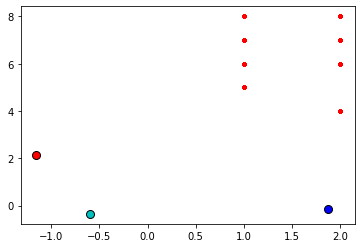

In [16]:
centers=dataB_kmeans.cluster_centers_   #类别中心
print(centers)
colors=['r','c','b','g','y']
plt.figure()
for j in range(3):
    index_set=np.where(dataB_pre==j)
    cluster=x.iloc[index_set]
    plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1],c=colors[j],marker='.')  
    plt.plot(centers[j][0],centers[j][1],'o',markerfacecolor=colors[j],markeredgecolor='k',markersize=8)  #画类别中心
plt.show()

[[-1.1626991   2.1312295  -0.06995361 -0.15519457]
 [-0.60040267 -0.3520296  -0.59599446 -0.60595563]
 [ 1.87382808 -0.16010739 -1.78638712 -0.02576528]
 [-0.1862576  -0.21503746 -0.01793718  1.54824342]
 [ 0.77429634 -0.32881816  1.02475691 -0.02629288]]


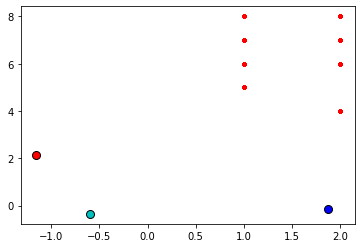

In [17]:
centers=dataB_kmeans.cluster_centers_   #类别中心
print(centers)
colors=['r','c','b','g','y']
plt.figure()
for j in range(3):
    index_set=np.where(dataB_pre==j)
    cluster=x.iloc[index_set]
    plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1],c=colors[j],marker='.')  
    plt.plot(centers[j][0],centers[j][1],'o',markerfacecolor=colors[j],markeredgecolor='k',markersize=8)  #画类别中心
plt.show()

# <center><font size=3>
    历史行为特征分别在实训二实训三的应用

In [18]:
data5_selection3 = data5[['职业','年龄','住家']]## 选取需求特征
L = data5_selection3["年龄"]-data5_selection3["住家"]
data5_features3 = pd.concat([L,data5_selection3.iloc[:,2:]],axis = 1)
print('构建的收入风险特征前5行为：\n',data5_features3)
dataC = StandardScaler().fit_transform(data5_features3)
print('标准化后收入风险情况五个特征为：\n',dataC[:5,:])

构建的收入风险特征前5行为：
        0  住家
0      2   1
1      6   1
2      1   1
3      6   1
4      3   1
5      2   1
7      1   1
8      1   1
9      2   1
10     1   1
11     2   1
12     2   1
13     8   1
14     2   1
15     2   1
16     4   1
17     0   1
18     3   1
20     0   1
21     7   1
22     3   1
23     4   1
24     0   1
25     3   1
26     4   1
27     6   1
29     1   1
30     4   1
31     2   1
32     0   1
...   ..  ..
65500  0   4
65501 -2   4
65502 -2   4
65503  3   4
65504  1   4
65505 -3   4
65506 -3   4
65507  2   4
65510 -1   4
65511 -1   4
65512 -3   4
65513  3   4
65514  0   4
65515 -3   4
65516 -1   4
65518 -2   4
65519 -3   4
65520 -2   5
65521  3   4
65523  1   4
65524 -4   5
65525 -2   5
65526 -1   5
65527 -2   5
65528 -2   5
65529 -1   5
65530  0   5
65531 -2   5
65532  0   5
65534  2   1

[60578 rows x 2 columns]
标准化后收入风险情况五个特征为：
 [[ 0.42179972 -1.95817546]
 [ 1.93584489 -1.95817546]
 [ 0.04328843 -1.95817546]
 [ 1.93584489 -1.95817546]
 [ 0.80031101 -1.95817546]

In [19]:
dataC_kmeans = KMeans(n_clusters = 5,n_jobs=3,random_state=123).fit(dataC) 
print('最终每个类别的数目为：\n',dataC_kmeans)
r3=pd.Series(dataC_kmeans.labels_).value_counts()
print(r3)

最终每个类别的数目为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=3, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)
0    20614
1    14831
4    10379
3     8587
2     6167
dtype: int64


In [20]:
dataC_kmeans.cluster_centers_

array([[-0.54004937, -0.17050883],
       [ 1.09010912, -0.1082891 ],
       [ 0.14664711,  1.10205155],
       [ 0.76055124, -1.77571465],
       [-1.20146998,  1.30769964]])

In [21]:
dataC_kmeans.labels_

array([3, 3, 3, ..., 4, 2, 3])

[[-0.54004937 -0.17050883]
 [ 1.09010912 -0.1082891 ]
 [ 0.14664711  1.10205155]
 [ 0.76055124 -1.77571465]
 [-1.20146998  1.30769964]]


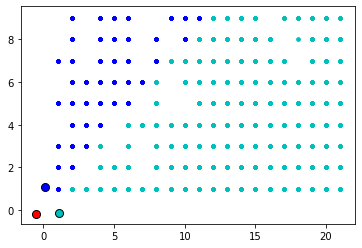

In [22]:
x=data5_selection3.iloc[:,:-1]  
y=data5_selection3.iloc[:,-1]
dataC_pre=dataC_kmeans.predict(x) 
centers=dataC_kmeans.cluster_centers_   #类别中心
print(centers)
colors=['r','c','b','g','y']
plt.figure()
for j in range(3):
    index_set=np.where(dataC_pre==j)
    cluster=x.iloc[index_set]
    plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1],c=colors[j],marker='.')  
    plt.plot(centers[j][0],centers[j][1],'o',markerfacecolor=colors[j],markeredgecolor='k',markersize=8)  #画类别中心
plt.show()

# <center><font size=3>
    历史行为特征分别在实训二实训三的应用
    接下来是实训3部分

In [23]:
clf = KMeans(n_clusters=5)  
#表示输出将数据集分成类簇数为5的聚类#输出聚类预测结果，对X聚类，20行数据，每个y_pred对应X的一行或一个孩子，聚成3类，类标为0、1、2
dataC_pred = clf.fit_predict(dataC)  
print(dataC_pred)  #输出结果

[2 2 2 ... 3 3 2]


In [24]:
#因为
x = data5_selection2.iloc[:,0] #获取第1列的值
print(x) 
y = data5_selection2.iloc[:,1]#获取第2列的值
print(y)
# 可视化操作#绘制散点图（scatter），横轴为x，获取的第1列数据；纵轴为y，获取的第2列数据；
#c=y_pred对聚类的预测结果画出散点图，marker='o'说明用点表示图形

0        2
1        2
2        2
3        2
4        2
5        2
7        2
8        2
9        2
10       2
11       2
12       1
13       1
14       2
15       2
16       2
17       2
18       1
20       2
21       2
22       2
23       1
24       2
25       2
26       2
27       2
29       2
30       2
31       2
32       2
        ..
65500    1
65501    2
65502    2
65503    2
65504    2
65505    2
65506    2
65507    2
65510    2
65511    2
65512    2
65513    2
65514    2
65515    2
65516    2
65518    2
65519    2
65520    2
65521    2
65523    2
65524    2
65525    2
65526    2
65527    2
65528    2
65529    2
65530    2
65531    2
65532    2
65534    2
Name: 借款余额, Length: 60578, dtype: int64
0        1
1        1
2        1
3        1
4        1
5        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
29 

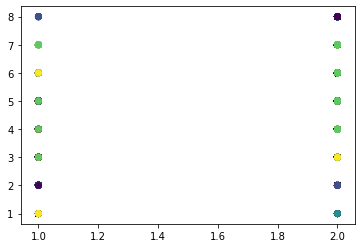

In [25]:
plt.scatter(x,y, c=dataC_pred, marker='o')